In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from os.path import join
import os

# Read in Citibike stations.

In [2]:
root = ".."
input_dir = join(root, "data", "citibike_stations")
input_filename = "citibike_stations.shp"
stations = gpd.read_file(join(input_dir, input_filename))

In [3]:
stations.head()

,id,name,test,docks,geometry
0,72,W 52 St & 11 Ave,0,39,POINT (-73.99392888 40.76727216)
1,79,Franklin St & W Broadway,0,33,POINT (-74.00666661 40.71911552)
2,82,St James Pl & Pearl St,0,27,POINT (-74.00016545 40.71117416)
3,83,Atlantic Ave & Fort Greene Pl,0,62,POINT (-73.97632328 40.68382604)
4,119,Park Ave & St Edwards St,0,19,POINT (-73.97803415 40.69608941)


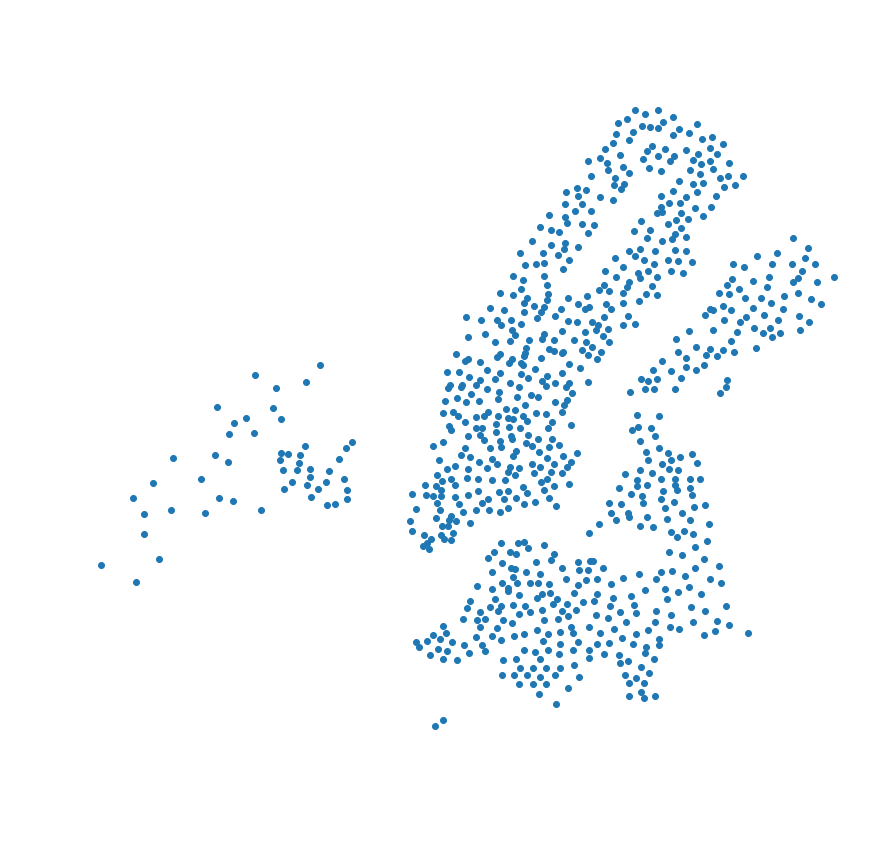

Citibike Stations


In [4]:
f, ax = plt.subplots(1, figsize=(15,15))
stations.plot(ax=ax, )
ax.set_axis_off()
plt.axis('equal')
plt.show()
print("Citibike Stations")

# Read in NYC and Jersey City neighborhoods.

Jersey City polygon was drawn manually in QGIS.

In [5]:
input_dir = join(root, "data", "neighborhood_tabulation_areas", "nyc_and_jc_neighborhoods")
input_filename = "nyc_and_jc_neighborhoods.shp"
neighborhoods = gpd.read_file(join(input_dir, input_filename))

In [6]:
neighborhoods.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry
0,3,Brooklyn,047,BK88,Borough Park,39247.228028,5.400502e+07,POLYGON ((-73.97604935657381 40.63127590564677...
1,4,Queens,081,QN52,East Flushing,25843.364936,2.945438e+07,POLYGON ((-73.79493246233996 40.75779803007455...
2,4,Queens,081,QN48,Auburndale,32446.878673,3.416422e+07,POLYGON ((-73.77573836927098 40.74332564716399...
3,4,Queens,081,QN51,Murray Hill,33266.904811,5.248828e+07,POLYGON ((-73.80379022888246 40.77561011179249...
4,4,Queens,081,QN27,East Elmhurst,19816.712323,1.972685e+07,"POLYGON ((-73.86109724335759 40.7636644770869,..."


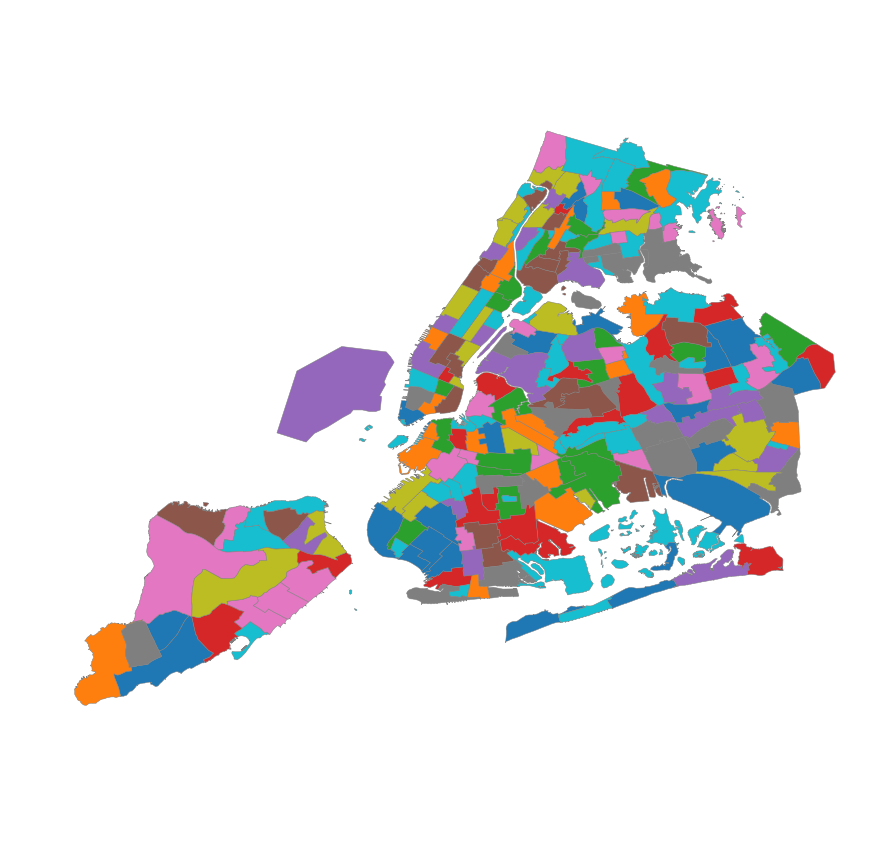

NYC Neighborhood Tabulation Areas (Equirectangular Projection)


In [7]:
f, ax = plt.subplots(1, figsize=(15,15))
neighborhoods.plot(ax=ax, linewidth=0.5, edgecolor='0.5', column='NTAName')
ax.set_axis_off()
plt.axis('equal')
plt.show()
print("NYC Neighborhood Tabulation Areas (Equirectangular Projection)")

# Spatial Join stations to neighborhoods.

In [8]:
stations = gpd.sjoin(stations, neighborhoods, how="left", op='within')

In [9]:
stations.head()

,id,name,test,docks,geometry,index_right,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area
0,72,W 52 St & 11 Ave,0,39,POINT (-73.99392888 40.76727216),70,1,Manhattan,061,MN15,Clinton,35037.171670,1.838139e+07
1,79,Franklin St & W Broadway,0,33,POINT (-74.00666661 40.71911552),101,1,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,26854.636018,2.503262e+07
2,82,St James Pl & Pearl St,0,27,POINT (-74.00016545 40.71117416),114,1,Manhattan,061,MN27,Chinatown,20786.256014,1.450187e+07
3,83,Atlantic Ave & Fort Greene Pl,0,62,POINT (-73.97632328 40.68382604),47,3,Brooklyn,047,BK68,Fort Greene,19825.520886,1.648282e+07
4,119,Park Ave & St Edwards St,0,19,POINT (-73.97803415 40.69608941),47,3,Brooklyn,047,BK68,Fort Greene,19825.520886,1.648282e+07


In [11]:
output_dir = join(root, "data", "citibike_stations", "spatial_join.shp")

# Make data directory
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

stations.to_file(output_dir)

# How many citibike stations per neighborhood

In [14]:
input_dir = join(root, "data", "neighborhood_tabulation_areas", "nyc_neighborhoods_population_bikestations")
input_filename = "nyc_neighborhoods_population_bikestations.shp"
neighborhoods = gpd.read_file(join(input_dir, input_filename))

In [30]:
neighborhoods.sort_values(by='numStation', ascending=False).head(10)

,NTACode,NTAName,Borough,Year,Population,numStation,geometry
177,BK33,Carroll Gardens-Columbia Street-Red Hook,Brooklyn,2010,38353,34,POLYGON ((-73.99236367043248 40.68969012377699...
123,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,Manhattan,2010,70150,33,POLYGON ((-74.00153309066982 40.76264459812759...
178,BK37,Park Slope-Gowanus,Brooklyn,2010,67649,32,"POLYGON ((-73.97376084923565 40.6830494086398,..."
122,MN17,Midtown-Midtown South,Manhattan,2010,28630,30,POLYGON ((-73.97301487176121 40.76427887944521...
101,MN24,SoHo-TriBeCa-Civic Center-Little Italy,Manhattan,2010,42742,29,"POLYGON ((-73.9926032219844 40.7241364496834, ..."
170,MN23,West Village,Manhattan,2010,66880,27,"POLYGON ((-73.9899029597005 40.73443479013689,..."
140,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,Brooklyn,2010,34495,26,"POLYGON ((-73.97905767012278 40.7059528891006,..."
107,BK73,North Side-South Side,Brooklyn,2010,45774,26,"POLYGON ((-73.95814292441024 40.7244042844024,..."
189,MN12,Upper West Side,Manhattan,2010,132378,25,POLYGON ((-73.96003018437121 40.79803810739432...
27,QN70,Astoria,Queens,2010,78793,24,POLYGON ((-73.90202516499477 40.76741678384666...


In [50]:
neighborhoods.sort_values(by='numStation', ascending=False).head(10)

,NTACode,NTAName,Borough,Year,Population,numStation,geometry
177,BK33,Carroll Gardens-Columbia Street-Red Hook,Brooklyn,2010,38353,34,POLYGON ((-73.99236367043248 40.68969012377699...
123,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,Manhattan,2010,70150,33,POLYGON ((-74.00153309066982 40.76264459812759...
178,BK37,Park Slope-Gowanus,Brooklyn,2010,67649,32,"POLYGON ((-73.97376084923565 40.6830494086398,..."
122,MN17,Midtown-Midtown South,Manhattan,2010,28630,30,POLYGON ((-73.97301487176121 40.76427887944521...
101,MN24,SoHo-TriBeCa-Civic Center-Little Italy,Manhattan,2010,42742,29,"POLYGON ((-73.9926032219844 40.7241364496834, ..."
170,MN23,West Village,Manhattan,2010,66880,27,"POLYGON ((-73.9899029597005 40.73443479013689,..."
140,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,Brooklyn,2010,34495,26,"POLYGON ((-73.97905767012278 40.7059528891006,..."
107,BK73,North Side-South Side,Brooklyn,2010,45774,26,"POLYGON ((-73.95814292441024 40.7244042844024,..."
189,MN12,Upper West Side,Manhattan,2010,132378,25,POLYGON ((-73.96003018437121 40.79803810739432...
27,QN70,Astoria,Queens,2010,78793,24,POLYGON ((-73.90202516499477 40.76741678384666...


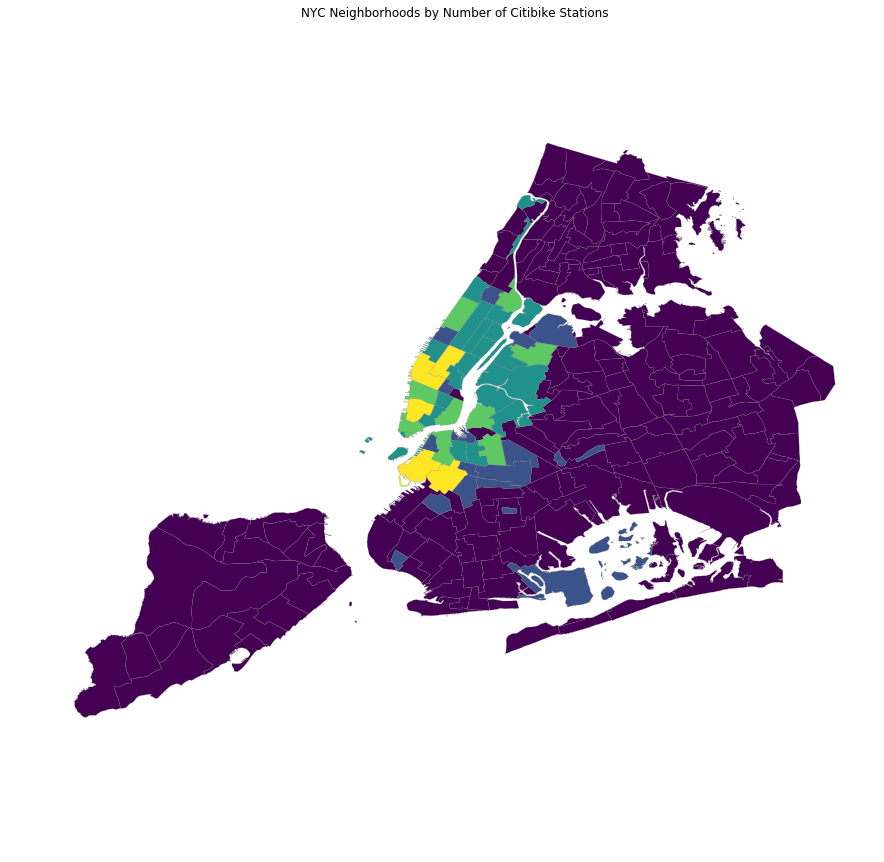

NYC Neighborhood Tabulation Areas (Equirectangular Projection)


In [31]:
f, ax = plt.subplots(1, figsize=(15,15))
neighborhoods.plot(ax=ax, linewidth=0.2, edgecolor='0.5', column='numStation', scheme="fisher_jenks")
ax.set_axis_off()
plt.axis('equal')
plt.title("NYC Neighborhoods by Number of Citibike Stations")
plt.show()
print("NYC Neighborhood Tabulation Areas (Equirectangular Projection)")

In [40]:
neighborhoods.head()

,NTACode,NTAName,Borough,Year,Population,numStation,geometry
0,BK88,Borough Park,Brooklyn,2010,106357,0,POLYGON ((-73.97604935657381 40.63127590564677...
1,QN52,East Flushing,Queens,2010,26982,0,POLYGON ((-73.79493246233996 40.75779803007455...
2,QN48,Auburndale,Queens,2010,19996,0,POLYGON ((-73.77573836927098 40.74332564716399...
3,QN51,Murray Hill,Queens,2010,51739,0,POLYGON ((-73.80379022888246 40.77561011179249...
4,QN27,East Elmhurst,Queens,2010,23150,0,"POLYGON ((-73.86109724335759 40.7636644770869,..."


In [41]:
output_dir = join(root, "data", "_model_inputs")

# Make data directory
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

In [42]:
outfilename = "neighborhood_NTACode.csv"

neighborhoods[['NTACode']].to_csv(join(output_dir, outfilename))

In [43]:
outfilename = "neighborhood_population.csv"

neighborhoods[['NTACode','Population']].to_csv(join(output_dir, outfilename))

In [44]:
outfilename = "neighborhood_number_of_citibike_stations.csv"

neighborhoods[['NTACode','numStation']].to_csv(join(output_dir, outfilename))